In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
from os.path import join as pjoin

In [3]:
import obr
from functionaries import *
from time_functions import stamp_Ymd
from os_functions import verify_folder_existence
from IPython.display import clear_output

In [4]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size':18})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [5]:
#SOURCES_FOLDER = "mcnp_out_medial\\"
SOURCES_FOLDER = "mcnp_out_20150520"
FOLDER_TO_SAVE_IMAGES = pjoin(SOURCES_FOLDER, '__images', stamp_Ymd())
verify_folder_existence(FOLDER_TO_SAVE_IMAGES)

# Энергетические спектры

In [6]:
names_temp = [('NP0a', 'PP0a'),
              ('NP5a',  'PP5a' ),
         ('NP10a', 'PP10a'),
         ('NP15a',  'PP15a' ),
         ('NP20a', 'PP20a'),
         ('NP25a',  'PP25a'),
         ('NP30a',  'PP30a' ),
         ('NP35a',  'PP35a' ),
         ('NP40a', 'PP40a'),
         ('NP45a',  'PP45a' ),
         ('NP50a',  'PP50a' )]
#names = names_temp
names = []
for name in names_temp:
    names.append((pjoin(SOURCES_FOLDER,name[0]), pjoin(SOURCES_FOLDER, name[1])))
names = np.array(names)
names

array([['mcnp_out_20150520\\NP0a', 'mcnp_out_20150520\\PP0a'],
       ['mcnp_out_20150520\\NP5a', 'mcnp_out_20150520\\PP5a'],
       ['mcnp_out_20150520\\NP10a', 'mcnp_out_20150520\\PP10a'],
       ['mcnp_out_20150520\\NP15a', 'mcnp_out_20150520\\PP15a'],
       ['mcnp_out_20150520\\NP20a', 'mcnp_out_20150520\\PP20a'],
       ['mcnp_out_20150520\\NP25a', 'mcnp_out_20150520\\PP25a'],
       ['mcnp_out_20150520\\NP30a', 'mcnp_out_20150520\\PP30a'],
       ['mcnp_out_20150520\\NP35a', 'mcnp_out_20150520\\PP35a'],
       ['mcnp_out_20150520\\NP40a', 'mcnp_out_20150520\\PP40a'],
       ['mcnp_out_20150520\\NP45a', 'mcnp_out_20150520\\PP45a'],
       ['mcnp_out_20150520\\NP50a', 'mcnp_out_20150520\\PP50a']], 
      dtype='|S23')

KeyboardInterrupt: 

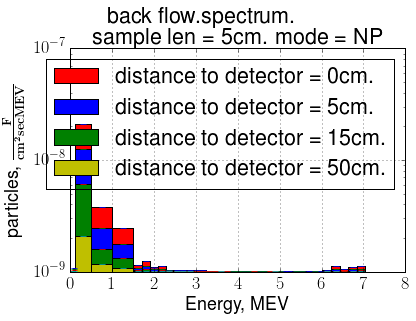

In [7]:
for name in names[1:]:
    plot_en_spectrums_in_back_going_flow(name[0],[0,5,15,50], ['red','blue','green','y'],pjoin(SOURCES_FOLDER, 'NP0a'),FOLDER_TO_SAVE_IMAGES)
    plot_en_spectrums_in_back_going_flow(name[1],[0,5,15,50], ['red','blue','green','y'],pjoin(SOURCES_FOLDER, 'PP0a'),FOLDER_TO_SAVE_IMAGES)
    plot_sum_en_spectrum_in_back_going_flow(name,[0,5,15,50], ['red','blue','green','y'],(pjoin(SOURCES_FOLDER, 'NP0a'),
                                                                                          pjoin(SOURCES_FOLDER, 'PP0a')),FOLDER_TO_SAVE_IMAGES)
    #clear_output(wait=True)

# Доза излучения в обратном потоке

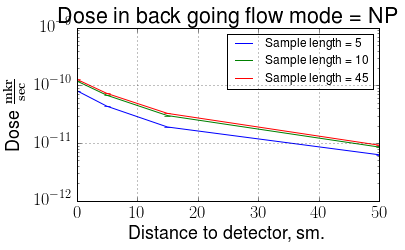

In [8]:
plot_dose_in_back_going_flow_for_each_file(names[:,0][[1,2,9]], [0,5,15,50], pjoin(SOURCES_FOLDER, 'NP0a'), FOLDER_TO_SAVE_IMAGES)

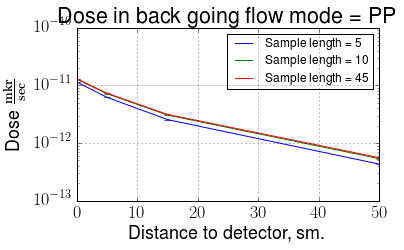

In [9]:
plot_dose_in_back_going_flow_for_each_file(names[:,1][[1,2,9]], [0,5,15,50], pjoin(SOURCES_FOLDER, 'PP0a'), FOLDER_TO_SAVE_IMAGES)

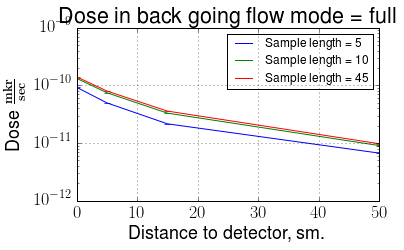

In [10]:
plot_full_dose_in_back_going_flow_for_each_file(names[[1,2,9]], [0,5,15,50], (pjoin(SOURCES_FOLDER, 'NP0a'),
                                                                              pjoin(SOURCES_FOLDER, 'PP0a')) , FOLDER_TO_SAVE_IMAGES)

# Доза излучения за образцом.

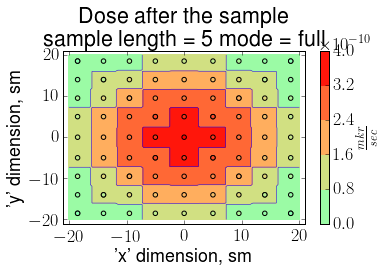

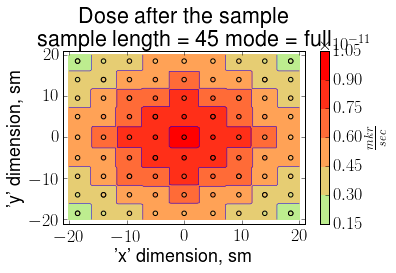

In [7]:
plot_dose_after_the_sample(names[[1,9]], FOLDER_TO_SAVE_IMAGES, interp_method='nearest')

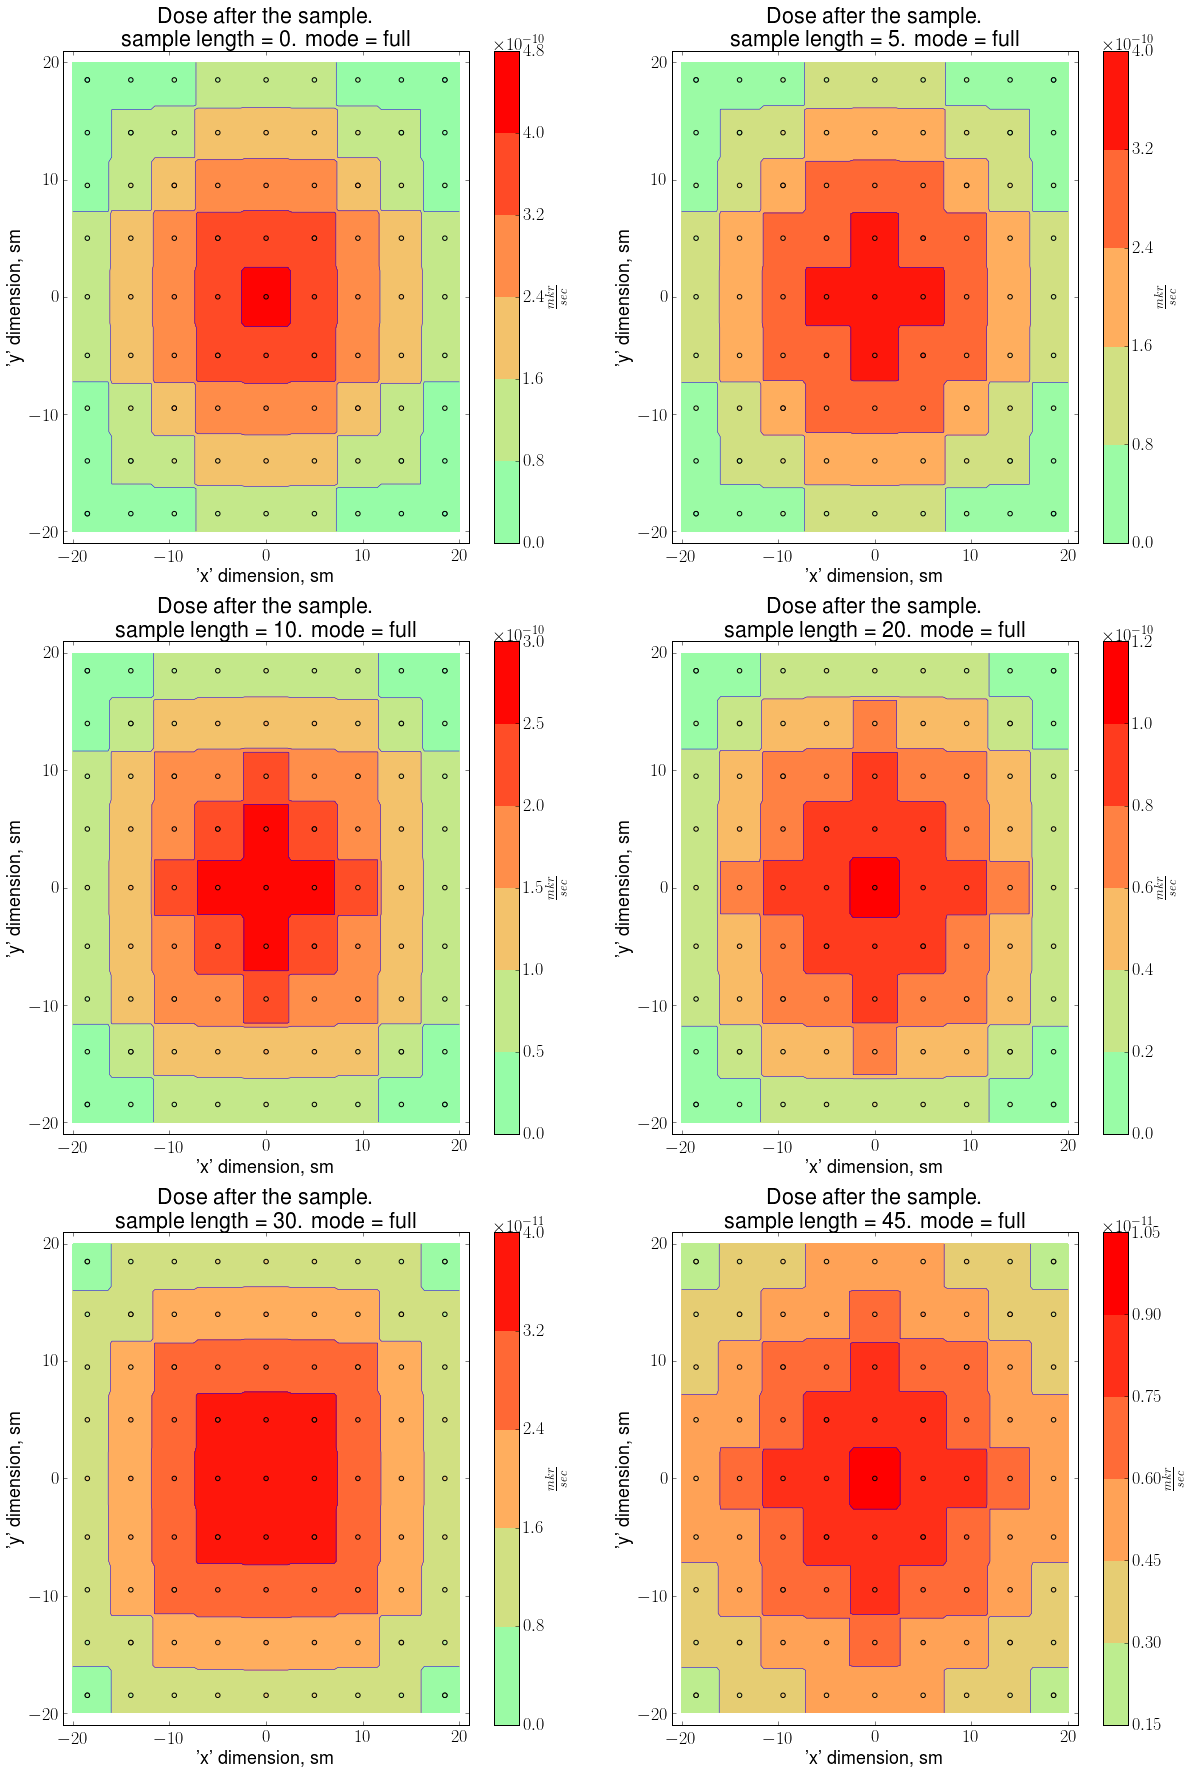

In [7]:
plot_dose_after_the_sample(names[[0,1,2,4,6,9]], FOLDER_TO_SAVE_IMAGES, subpl=(3,2), interp_method='nearest')
#plot_dose_after_the_sample(names[[0,1]], FOLDER_TO_SAVE_IMAGES, subpl=(2,1))

In [8]:
class PlotSmthAfterTheSampleCommon(object):
#class PlotSmthAfterTheSampleCommon:
    def __init__(self, file_name):
        if isinstance(file_name, list) or isinstance(file_name, tuple) or isinstance(file_name, np.ndarray):
            self.mode = 'full'
            assert len(file_name) == 2, "Should be photon and neutron files."
            self.neutron_file = file_name[0]
            self.photon_file = file_name[1]
            n_name = os.path.split(self.neutron_file)[1]
            n_l, n_type = sample_length_and_mode_by_file_name(n_name)
            p_name = os.path.split(self.photon_file)[1]
            p_l, p_type = sample_length_and_mode_by_file_name(p_name)
            assert n_type == 'NP', 'Firsts should be a neutron file'
            assert p_type == 'PP', 'Seconds should be a photon file'
            assert n_l == p_l, "Files should be the same length."
            self.length = n_l
        else:
            self.file_name = file_name
            self.length, self.mode = sample_length_and_mode_by_file_name(os.path.split(self.file_name)[1])
            
    
    #def get_values(self):
    #    raise NotImplementedError
    
    def plot(self, title_preffix, color='blue', y_label = r'particles, $\frac{F}{cm^2 sec}$'):
        self.title_preffix = title_preffix
        x, y, dy = self.get_values()
        plt.errorbar(x, y, color=color, yerr=dy, label=(str(self.length) ) + ' sm', fmt='-o')
        plt.title(self.title_preffix + r'  . mode = ' + self.mode)
        plt.xlabel(r'length, cm')
        plt.ylabel(y_label)
        return self.mode
        
class PlotDoseAfterTheSampleCommon(PlotSmthAfterTheSampleCommon):
    def get_values(self):
        if self.mode == 'full':
            tallies_n = obr.construct_tallies(self.neutron_file)
            tallies_p = obr.construct_tallies(self.photon_file)
            assert len(tallies_n) == len(tallies_p), "Files have different geometries."
            x = []
            y = []
            dy = []
            for i in range(len(tallies_n)):
                tally_n = tallies_n[i]
                tally_p = tallies_p[i]
                assert (tally_n.x == tally_p.x) and (tally_n.y == tally_p.y) and (tally_n.z == tally_p.z), "Files have different geometries."
                if (tally_n.z > 100) and (abs(tally_n.x) == abs(tally_n.y)):
                    x_ = 2**(1./2)*tally_n.x
                    yn, dyn = tally_n.get_dose()
                    yp, dyp = tally_p.get_dose()
                    y.append(yn + yp/4)
                    x.append(x_)
                    dy.append(dyn+dyp)
            x = np.array(x)
            y = np.array(y)
            dy = np.array(dy)
            sorting_indexes = np.argsort(x)
            x = x[sorting_indexes]
            y = y[sorting_indexes]
            dy = dy[sorting_indexes]
            return x, y, dy
        else:
            tallies = obr.construct_tallies(self.file_name)
            x = []
            y = []
            dy = []
            for tally in tallies:
                if self.mode == 'PP':
                    mult = 1./4
                else:
                    mult = 1
                if (tally.z > 100) and (abs(tally.x) == abs(tally.y)):
                    x_ = 2**(1./2)*tally.x
                    y_, dy_ = tally.get_dose()
                    y.append(y_*mult)
                    x.append(x_)
                    dy.append(dy_*mult)
            return np.array(x), np.array(y), np.array(dy)
        
        
            
def plot_doses_after_sample(names, indexes):
    c_generator = Colors_generator()
    plt.figure(figsize=FIGURES_SIZE)
    for i in indexes:
        mode = PlotDoseAfterTheSampleCommon(names[i]).plot('dose',
                                                    color=c_generator.get_next(),
                                                    y_label = r'dose, $\bf \frac{mkr}{sec}$')
    plt.yscale('log')
    plt.grid()
    plt.legend(loc='best', prop={'size':LEGENDS_SIZE})
    plt.gcf().subplots_adjust(bottom=0.2, top=0.8, left=0.2)
    plt.savefig(pjoin(FOLDER_TO_SAVE_IMAGES, 'dose_after_the_sample_common_style_' + mode + '.png'), dpi=300)
    plt.show()

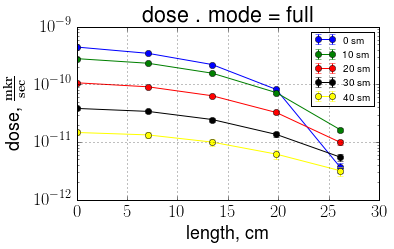

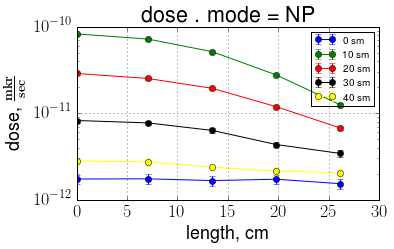

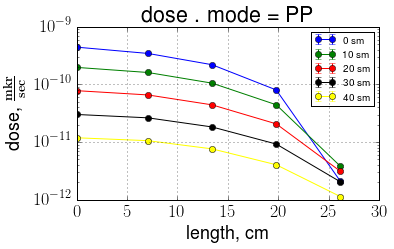

In [11]:
indexes = list(range(0,9,2))
plot_doses_after_sample(names, indexes)
plot_doses_after_sample(names[:,0], indexes)
plot_doses_after_sample(names[:,1], indexes)

# Стенка

In [10]:
figures_size = (6,4)
LEGENDS_SIZE = 10
class Colors_generator:
    def __init__(self):
        self.colors = ['blue','green','red','black','yellow','cyan','magenta']
        self.i = -1
        
    def current(self):
        return self.colors[self.i]
    
    def get_next(self):
        self.i = (self.i + 1)%len(self.colors)
        return self.current()
    
def plot_dose_on_wall(files_names):
    #print files_names
    colors = Colors_generator()
    fig = plt.figure(figsize=figures_size)
    names = [os.path.split(x)[1] for x in files_names]
    prefixes = [x[:2] for x in names]
    assert len(set(prefixes)) == 1, "Files are in differend modes."
    mode = prefixes[0]
    ys = []
    for file_ in files_names:
        #print file_
        length = parse_file_name(file_, ['length'])[0]
        tallies = obr.construct_tallies(file_)
        x = []
        y = []
        for tally in tallies:
            if tally.x == 0 and tally.y < -97:
                x.append(tally.z)
                y.append(tally.get_dose()[0])
        x = np.array(x)
        y = np.array(y)
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]
        #print x
        #print y
        if mode == 'PP':
            y = y/4.
        ys.append(y)
        plt.plot(x,y,marker='o', label=str(length), c=colors.get_next())
        plt.plot([100 + length,100 + length],[np.min(y),np.max(y)], '-.',c=colors.current(), linewidth=3)
        #break
    plt.plot([100,100],[np.min(ys),np.max(ys)], '--', c='blue')
    plt.legend(loc = 'best', prop={'size':LEGENDS_SIZE})
    title = 'Dose on wall ' + mode
    plt.title(title) 
    plt.xlabel("'z' dimension, cm")
    plt.ylabel(r'Dose $\bf \frac{mkr}{sec}$')
    plt.gcf().subplots_adjust(bottom=0.2, top=0.8, left=0.2)
    plt.savefig(pjoin(FOLDER_TO_SAVE_IMAGES, title.replace(' ','_') + '.png'))
    
def plot_full_dose_on_wall(files_names):
    #print files_names
    colors = Colors_generator()
    fig = plt.figure(figsize=figures_size)
    mode = 'full'
    ys = []
    for file_p, file_n in files_names:
        #print file_
        length = parse_file_name(file_n, ['length'])[0]
        tallies_n = obr.construct_tallies(file_n)
        tallies_p = obr.construct_tallies(file_p)
        x = []
        y = []
        for i in range(len(tallies_n)):
            if tallies_n[i].x == 0 and tallies_n[i].y < -97:
                x.append(tallies_n[i].z)
                y.append(tallies_n[i].get_dose()[0] + tallies_p[i].get_dose()[0]/4)
        x = np.array(x)
        y = np.array(y)
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]
        #print x
        #print y
        ys.append(y)
        plt.plot(x,y,marker='o', label=str(length), c=colors.get_next())
        plt.plot([100 + length,100 + length],[np.min(y),np.max(y)], '-.',c=colors.current(), linewidth=3)
        #break
    plt.plot([100,100],[np.min(ys),np.max(ys)], '--', c='blue')
    plt.legend(loc = 'best', prop={'size':LEGENDS_SIZE})
    title = 'Dose on wall ' + mode
    plt.title(title) 
    plt.xlabel("'z' dimension, cm")
    plt.ylabel(r'Dose $\bf \frac{mkr}{sec}$')
    plt.gcf().subplots_adjust(bottom=0.2, top=0.8, left=0.2)
    plt.savefig(pjoin(FOLDER_TO_SAVE_IMAGES, title.replace(' ','_') + '.png'))

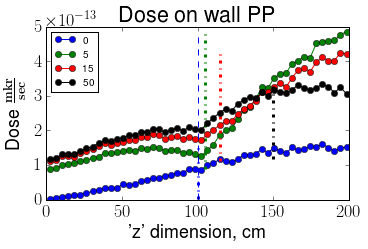

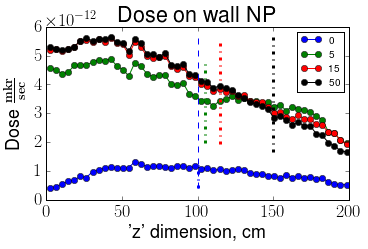

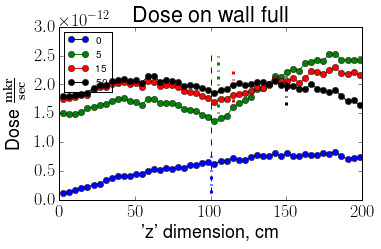

In [18]:
plot_dose_on_wall(names[:,1][[0,1,3,10]])
plot_dose_on_wall(names[:,0][[0,1,3,10]])
plot_full_dose_on_wall(names[[0,1,3,10]])

In [19]:
def full_flow_on_the_plate(names) :
    title = 'integral flow on plate. mode = full'
    colors = Colors_generator()
    fig = plt.figure(figsize=figures_size)
    #outt = open("images\\" + title + ".csv", 'w')
    #outt.write("samlpe_length,z,value,dispersion\n")
    for ind in range(len(names)):
        neutron_file, photon_file = names[ind]
        name = os.path.split(neutron_file)[1]
        if os.path.split(neutron_file)[1][1:] != os.path.split(photon_file)[1][1:]:
            print "files_not_correspond_to_each_other"
            return
        tallies_n, tallies_p = obr.construct_tallies(neutron_file), obr.construct_tallies(photon_file)
        
        if len(name) == 4:
            sample_length = int(name[2:3])
        else:
            sample_length = int(name[2:4])
        
        x = []
        y = []
        dy = []
        
        for tally_ind in range(len(tallies_n)):
            if tallies_n[tally_ind].y == -100 + 1.5:
                if tallies_p[tally_ind].y != -100 + 1.5:
                    print "wong tellies order"
                    return
                x.append(tallies_n[tally_ind].z)
                y_n, dy_n = tallies_n[tally_ind].get_value_from_diaposon(0.1)
                y_p, dy_p = tallies_p[tally_ind].get_value_from_diaposon(0.1)
                y_p, dy_p = y_p/4, dy_p
                y.append(y_n + y_p)
                dy.append(y_n*dy_n + y_p*dy_p)
                #outt.write(str(sample_length) + ',' + str(x[-1]) + ',' + str(y[-1]) + ',' + str(dy[-1]) + '\n')
                
        plt.errorbar(x, y, color=colors.get_next(), yerr=dy, label=( "sample length = " + str(sample_length) + 'sm.'), fmt='o')
        plt.xlabel(r'z, cm')
        plt.ylabel(r'particles, $\bf \frac{F}{cm^2 sec}$')
        plt.plot([100 + sample_length,100 + sample_length],[np.min(y),np.max(y)], '-.',c=colors.current(), linewidth=3)
        #plt.plot(mid, y, 'r--')
        #plt.savefig("images\\" + title + ".png", dpi = 300)
        #plt.show()
        #plt.close()
    
    #x=[i for i in range(60,100)]
    #y=[8*10**(-6) for i in range(60,100)]
    #plt.plot(x,y, color='black', linewidth=20, label='sample')
    
    #outt.close()
    plt.legend(fontsize=10, loc='best', prop={'size':LEGENDS_SIZE})
    plt.yscale('log')
    plt.title(title)
    #plt.ylim(ymin=5*10**(-10), ymax=2*10**(-8))
    plt.grid()
    plt.gcf().subplots_adjust(bottom=0.2, top=0.8, left=0.2)
    plt.savefig(pjoin(FOLDER_TO_SAVE_IMAGES, title.replace(' ','_') + ".png"), dpi = 300)
    plt.show()
    plt.close()

def PP_flow_on_the_plate(names) :
    title = 'integral flow on plate mode = PP'
    colors = Colors_generator()
    fig = plt.figure(figsize=figures_size)
    #outt = open("images\\" + title + ".csv", 'w')
    #outt.write("samlpe_length,z,value,dispersion\n")
    for ind in range(len(names)):
        photon_file = names[ind]
        name = os.path.split(names[ind])[1]
        tallies_p = obr.construct_tallies(photon_file)
        
        if len(name) == 4:
            sample_length = int(name[2:3])
        else:
            sample_length = int(name[2:4])
        
        x = []
        y = []
        dy = []
        
        for tally_ind in range(len(tallies_p)):
            if tallies_p[tally_ind].y == -100 + 1.5:
                x.append(tallies_p[tally_ind].z)
                y_p, dy_p = tallies_p[tally_ind].get_value_from_diaposon(0.1)
                y_p, dy_p = y_p/4, dy_p
                y.append(y_p)
                dy.append(y_p*dy_p)
                #outt.write(str(sample_length) + ',' + str(x[-1]) + ',' + str(y[-1]) + ',' + str(dy[-1]) + '\n')
                
        plt.errorbar(x, y, color=colors.get_next(), yerr=dy, label=( "sample length = " + str(sample_length) + 'sm.'), fmt='o')
        plt.xlabel(r'z, cm')
        plt.ylabel(r'particles, $\bf \frac{F}{cm^2 sec}$')
        plt.plot([100 + sample_length,100 + sample_length],[np.min(y),np.max(y)], '-.',c=colors.current(), linewidth=3)
        
        #plt.plot(mid, y, 'r--')
        #plt.savefig("images\\" + title + ".png", dpi = 300)
        #plt.show()
        #plt.close()
    
    #x=[i for i in range(60,100)]
    #y=[8*10**(-6) for i in range(60,100)]
    #plt.plot(x,y, color='black', linewidth=20, label='sample')
    
    #outt.close()
    plt.legend(fontsize=10, loc='best', prop={'size':LEGENDS_SIZE})
    plt.yscale('log')
    plt.title(title)
    #plt.ylim(ymin=5*10**(-10), ymax=2*10**(-8))
    plt.grid()
    plt.gcf().subplots_adjust(bottom=0.2, top=0.8, left=0.2)
    plt.savefig(pjoin(FOLDER_TO_SAVE_IMAGES, title.replace(' ','_') + ".png"), dpi = 300)
    plt.show()
    plt.close()
    
def NP_flow_on_the_plate(names) :
    title = 'integral flow on plate mode = NP'
    colors = Colors_generator()
    fig = plt.figure(figsize=figures_size)
    #outt = open("images\\" + title + ".csv", 'w')
    #outt.write("samlpe_length,z,value,dispersion\n")
    for ind in range(len(names)):
        neutron_file = names[ind]
        name = os.path.split(names[ind])[1]
        tallies_n = obr.construct_tallies(neutron_file)
        
        if len(name) == 4:
            sample_length = int(name[2:3])
        else:
            sample_length = int(name[2:4])
        
        x = []
        y = []
        dy = []
        
        for tally_ind in range(len(tallies_n)):
            if tallies_n[tally_ind].y == -100 + 1.5:
                x.append(tallies_n[tally_ind].z)
                y_n, dy_n = tallies_n[tally_ind].get_value_from_diaposon(0.1)
                y.append(y_n)
                dy.append(y_n*dy_n)
                #outt.write(str(sample_length) + ',' + str(x[-1]) + ',' + str(y[-1]) + ',' + str(dy[-1]) + '\n')
                
        plt.errorbar(x, y, color=colors.get_next(), yerr=dy, label=( "sample length = " + str(sample_length) + 'sm.'), fmt='o')
        plt.xlabel(r'z, cm')
        plt.ylabel(r'particles, $\bf \frac{F}{cm^2 sec}$')
        plt.plot([100 + sample_length,100 + sample_length],[np.min(y),np.max(y)], '-.',c=colors.current(), linewidth=3)
        
        #plt.plot(mid, y, 'r--')
        #plt.savefig("images\\" + title + ".png", dpi = 300)
        #plt.show()
        #plt.close()
    
    #x=[i for i in range(60,100)]
    #y=[8*10**(-6) for i in range(60,100)]
    #plt.plot(x,y, color='black', linewidth=20, label='sample')
    
    #outt.close()
    plt.legend(fontsize=10, loc='best', prop={'size':LEGENDS_SIZE})
    plt.yscale('log')
    plt.title(title)
    #plt.ylim(ymin=5*10**(-10), ymax=2*10**(-8))
    plt.grid()
    plt.gcf().subplots_adjust(bottom=0.2, top=0.8, left=0.2)
    plt.savefig(pjoin(FOLDER_TO_SAVE_IMAGES, title.replace(' ','_') + ".png"), dpi = 300)
    plt.show()
    plt.close()

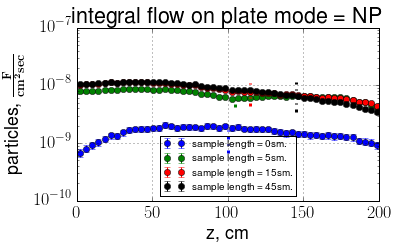

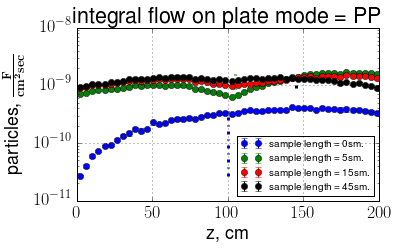

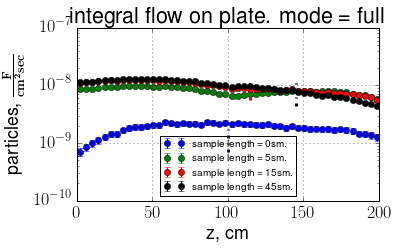

In [20]:
NP_flow_on_the_plate((names[0][0], names[1][0], names[3][0], names[9][0]))
PP_flow_on_the_plate((names[0][1], names[1][1], names[3][1], names[9][1]))
full_flow_on_the_plate((names[0], names[1], names[3], names[9]))

In [17]:
(names[0], names[3], names[6], names[9])

(array(['mcnp_out_medial\\NP0a', 'mcnp_out_medial\\PP0a'], 
       dtype='|S21'),
 array(['mcnp_out_medial\\NP15a', 'mcnp_out_medial\\PP15a'], 
       dtype='|S21'),
 array(['mcnp_out_medial\\NP30a', 'mcnp_out_medial\\PP30a'], 
       dtype='|S21'),
 array(['mcnp_out_medial\\NP45a', 'mcnp_out_medial\\PP45a'], 
       dtype='|S21'))

In [19]:
# full flow on the plate tails

def full_flow_on_the_plate(names, colores, E_cut_off=0) :
    title = 'integral flow on plate. mode = full'
    #outt = open("images\\" + title + ".csv", 'w')
    #outt.write("samlpe_length,z,value,dispersion\n")
    for ind in range(len(names)):
        neutron_file, photon_file = names[ind]
        name = os.path.split(neutron_file)[1]
        col = colores[ind]
        if os.path.split(neutron_file)[1][1:] != os.path.split(photon_file)[1][1:]:
            print "files_not_correspond_to_each_other"
            return
        tallies_n, tallies_p = obr.construct_tallies(neutron_file), obr.construct_tallies(photon_file)
        
        if len(name) == 4:
            sample_length = int(name[2:3])
        else:
            sample_length = int(name[2:4])
        
        x = []
        y = []
        dy = []
        
        for tally_ind in range(len(tallies_n)):
            if tallies_n[tally_ind].y == -100 + 1.5:
                if tallies_p[tally_ind].y != -100 + 1.5:
                    print "wong tellies order"
                    return
                x.append(tallies_n[tally_ind].z)
                y_n, dy_n = tallies_n[tally_ind].get_value_from_diaposon(E_cut_off)
                y_p, dy_p = tallies_p[tally_ind].get_value_from_diaposon(E_cut_off)
                y_p, dy_p = y_p/4, dy_p
                y.append(y_n + y_p)
                dy.append(y_n*dy_n + y_p*dy_p)
                #outt.write(str(sample_length) + ',' + str(x[-1]) + ',' + str(y[-1]) + ',' + str(dy[-1]) + '\n')
                
        plt.errorbar(x, y, color=col, yerr=dy, label=( "sample length = " + str(sample_length) + 'sm.'), fmt='o')
        plt.title(r'plate.integral.\\sample len = ' + str(sample_length) + r'cm. mode = full')
        plt.xlabel(r'z, cm')
        plt.ylabel(r'particles, $\frac{F}{cm^2 sec}$')
        #plt.plot(mid, y, 'r--')
        #plt.savefig("images\\" + title + ".png", dpi = 300)
        #plt.show()
        #plt.close()
    
    #x=[i for i in range(60,100)]
    #y=[8*10**(-6) for i in range(60,100)]
    #plt.plot(x,y, color='black', linewidth=20, label='sample')
    
    #outt.close()
    plt.legend(fontsize=10, loc='best')
    plt.yscale('log')
    #plt.ylim(ymin=5*10**(-10), ymax=2*10**(-8))
    plt.grid()
    #plt.savefig("images\\" + title + ".png", dpi = 300)
    plt.show()
    plt.close()

def PP_flow_on_the_plate(names, colores, E_cut_off=0) :
    title = 'integral flow on plate. mode = PP'
    #outt = open("images\\" + title + ".csv", 'w')
    #outt.write("samlpe_length,z,value,dispersion\n")
    for ind in range(len(names)):
        photon_file = names[ind]
        name = os.path.split(names[ind])[1]
        col = colores[ind]
        tallies_p = obr.construct_tallies(photon_file)
        
        if len(name) == 4:
            sample_length = int(name[2:3])
        else:
            sample_length = int(name[2:4])
        
        x = []
        y = []
        dy = []
        
        for tally_ind in range(len(tallies_p)):
            if tallies_p[tally_ind].y == -100 + 1.5:
                x.append(tallies_p[tally_ind].z)
                y_p, dy_p = tallies_p[tally_ind].get_value_from_diaposon(E_cut_off)
                y_p, dy_p = y_p/4, dy_p
                y.append(y_p)
                dy.append(y_p*dy_p)
                #outt.write(str(sample_length) + ',' + str(x[-1]) + ',' + str(y[-1]) + ',' + str(dy[-1]) + '\n')
                
        plt.errorbar(x, y, color=col, yerr=dy, label=( "sample length = " + str(sample_length) + 'sm.'), fmt='o')
        plt.title(r'plate.integral.\\sample len = ' + str(sample_length) + r'cm. mode = PP')
        plt.xlabel(r'z, cm')
        plt.ylabel(r'particles, $\frac{F}{cm^2 sec}$')
        #plt.plot(mid, y, 'r--')
        #plt.savefig("images\\" + title + ".png", dpi = 300)
        #plt.show()
        #plt.close()
    
    #x=[i for i in range(60,100)]
    #y=[8*10**(-6) for i in range(60,100)]
    #plt.plot(x,y, color='black', linewidth=20, label='sample')
    
    #outt.close()
    plt.legend(fontsize=10, loc='best')
    plt.yscale('log')
    #plt.ylim(ymin=5*10**(-10), ymax=2*10**(-8))
    plt.grid()
    #plt.savefig("images\\" + title + ".png", dpi = 300)
    plt.show()
    plt.close()
    
def NP_flow_on_the_plate(names, colores, E_cut_off=0) :
    title = 'integral flow on plate. mode = NP'
    #outt = open("images\\" + title + ".csv", 'w')
    #outt.write("samlpe_length,z,value,dispersion\n")
    for ind in range(len(names)):
        neutron_file = names[ind]
        name = os.path.split(names[ind])[1]
        col = colores[ind]
        tallies_n = obr.construct_tallies(neutron_file)
        
        if len(name) == 4:
            sample_length = int(name[2:3])
        else:
            sample_length = int(name[2:4])
        
        x = []
        y = []
        dy = []
        
        for tally_ind in range(len(tallies_n)):
            if tallies_n[tally_ind].y == -100 + 1.5:
                x.append(tallies_n[tally_ind].z)
                y_n, dy_n = tallies_n[tally_ind].get_value_from_diaposon(E_cut_off)
                y.append(y_n)
                dy.append(y_n*dy_n)
                #outt.write(str(sample_length) + ',' + str(x[-1]) + ',' + str(y[-1]) + ',' + str(dy[-1]) + '\n')
                
        plt.errorbar(x, y, color=col, yerr=dy, label=( "sample length = " + str(sample_length) + 'sm.'), fmt='o')
        plt.title(r'plate.integral.\\sample len = ' + str(sample_length) + r'cm. mode = NP')
        plt.xlabel(r'z, cm')
        plt.ylabel(r'particles, $\frac{F}{cm^2 sec}$')
        #plt.plot(mid, y, 'r--')
        #plt.savefig("images\\" + title + ".png", dpi = 300)
        #plt.show()
        #plt.close()
    
    #x=[i for i in range(60,100)]
    #y=[8*10**(-6) for i in range(60,100)]
    #plt.plot(x,y, color='black', linewidth=20, label='sample')
    
    #outt.close()
    plt.legend(fontsize=10, loc='best')
    plt.yscale('log')
    #plt.ylim(ymin=5*10**(-10), ymax=2*10**(-8))
    plt.grid()
    #plt.savefig("images\\" + title + ".png", dpi = 300)
    plt.show()
    plt.close()

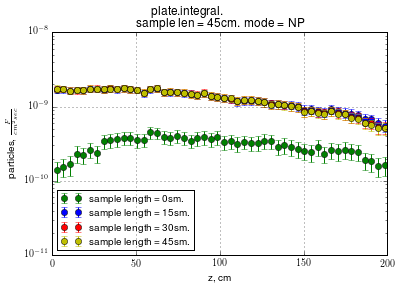

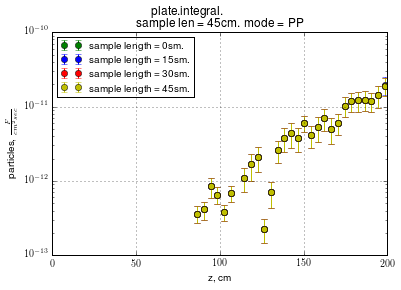

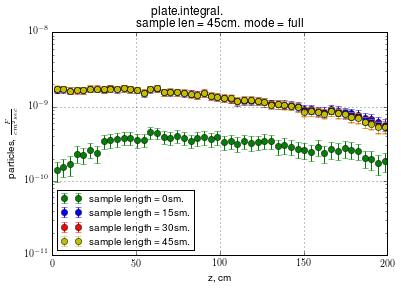

In [23]:
E_cut_off = 2.5
NP_flow_on_the_plate((names[0][0], names[3][0], names[6][0], names[9][0]), ['green','blue','red','y'], E_cut_off)
PP_flow_on_the_plate((names[0][1], names[3][1], names[6][1], names[9][1]), ['green','blue','red','y'], E_cut_off)
full_flow_on_the_plate((names[0], names[3], names[6], names[9]), ['green','blue','red','y'], E_cut_off)

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output

def all_doses(file_, e, a):
    fig = plt.figure(figsize=(10,12))
    ax = fig.add_subplot(111, projection='3d')
    name = os.path.split(file_)[1]
    tallies = obr.construct_tallies(file_)
    x=[]
    y=[]
    z=[]
    doses = []
    mode = name[:2]
    if mode=='PP':
        etalon_tallies = obr.construct_tallies(pjoin(SOURCES_FOLDER,'PP0a'))
    for i in range(len(tallies)):
        x.append(tallies[i].x)
        z.append(tallies[i].z)
        y.append(tallies[i].y)
        if mode=='PP':
            if tallies[i].z < 100 and abs(tallies[i].y) < 18:
                doses.append((tallies[i].get_dose()[0] - etalon_tallies[i].get_dose()[0])/4.)
            else:
                doses.append((tallies[i].get_dose()[0])/4.)
        else:
            doses.append(tallies[i].get_dose()[0])
    doses_n = doses/np.max(doses)
    #doses_n = doses_n
    z = np.array(z)
    sct = ax.scatter(x,y,z,c=doses_n,s=100*doses_n, cmap='jet')
    colbar = fig.colorbar(sct)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim3d(-100, 100)
    ax.set_ylim3d(-100, 100)
    ax.set_zlim3d(0, 200)
    ax.set_title(mode + '  ' + name[2:-1])
    
    ax.azim = a
    ax.elev = e
    return fig

def all_doses_full(file_p, file_n, e, a):
    #fig = plt.figure(figsize=(10,12))
    #ax = fig.add_subplot(111, projection='3d')
    tallies_p = obr.construct_tallies(file_p)
    tallies_n = obr.construct_tallies(file_n)
    x=[]
    y=[]
    z=[]
    doses = []
    etalon_tallies = obr.construct_tallies(pjoin(SOURCES_FOLDER,'PP0a'))
    for i in range(len(tallies_p)):
        x.append(tallies_p[i].x)
        z.append(tallies_p[i].z)
        y.append(tallies_p[i].y)
        if tallies_p[i].z < 100 and abs(tallies_p[i].y) < 18:
            doses.append(tallies_n[i].get_dose()[0] + (tallies_p[i].get_dose()[0] - etalon_tallies[i].get_dose()[0])/4.)
        else:
            doses.append(tallies_n[i].get_dose()[0] + tallies_p[i].get_dose()[0]/4.)
    #doses_n = doses/np.max(doses)
    #doses_n = doses_n
    z = np.array(z)
    #sct = ax.scatter(x,y,z,c=doses_n,s=100*doses_n, cmap='jet')
    #colbar = fig.colorbar(sct)
    #ax.set_xlabel("X")
    #ax.set_ylabel("Y")
    #ax.set_zlabel("Z")
    #ax.set_xlim3d(-100, 100)
    #ax.set_ylim3d(-100, 100)
    #ax.set_zlim3d(0, 200)
    #ax.set_title("full" + '  ' + [2:-1])
    
    #ax.azim = a
    #ax.elev = e
    return x,y,z,doses

In [8]:
verify_folder_existence('__video')
counter = 0
for e in range(-30,61,30):
    for a in range(0,360,3):
        name = str(counter).rjust(5,'0')+'.png'
        print '\r', name,
        fig = all_doses_full(pjoin(SOURCES_FOLDER,"PP50a"),pjoin(SOURCES_FOLDER,"NP50a"), e=e, a=a)
        #plt.show()
        fig.savefig('__video/'+name)
        counter += 1
        fig.clear()
        clear_output(wait=True)

# Любое распределение

In [21]:
def all_doses_full(file_n, file_p):
    #fig = plt.figure(figsize=(10,12))
    #ax = fig.add_subplot(111, projection='3d')
    tallies_p = obr.construct_tallies(file_p)
    tallies_n = obr.construct_tallies(file_n)
    x=[]
    y=[]
    z=[]
    doses = []
    etalon_tallies = obr.construct_tallies(pjoin(SOURCES_FOLDER,'PP0a'))
    for i in range(len(tallies_p)):
        if abs(tallies_p[i].x) < 20 and abs(tallies_p[i].y) < 20 and tallies_p[i].z > 100 or True:
            for x_,y_ in extend_x_y(tallies_p[i].x,tallies_p[i].y):
                x.append(x_)
                z.append(tallies_p[i].z)
                y.append(y_)
                doses.append(tallies_n[i].get_dose()[0] + tallies_p[i].get_dose()[0]/4.) 
        else:
            x.append(tallies_p[i].x)
            z.append(tallies_p[i].z)
            y.append(tallies_p[i].y)
            if tallies_p[i].z < 100 and abs(tallies_p[i].y) < 18:
                doses.append(tallies_n[i].get_dose()[0] + (tallies_p[i].get_dose()[0] - etalon_tallies[i].get_dose()[0])/4.)
            else:
                doses.append(tallies_n[i].get_dose()[0] + tallies_p[i].get_dose()[0]/4.)
    #doses_n = doses/np.max(doses)
    #doses_n = doses_n
    z = np.array(z)
    #sct = ax.scatter(x,y,z,c=doses_n,s=100*doses_n, cmap='jet')
    #colbar = fig.colorbar(sct)
    #ax.set_xlabel("X")
    #ax.set_ylabel("Y")
    #ax.set_zlabel("Z")
    #ax.set_xlim3d(-100, 100)
    #ax.set_ylim3d(-100, 100)
    #ax.set_zlim3d(0, 200)
    #ax.set_title("full" + '  ' + [2:-1])
    
    #ax.azim = a
    #ax.elev = e
    return x,y,z,doses

In [22]:
def any_points_doses_old(points, x,y,z, doses):
    ans = []
    for p in points:
        dose = 0
        for x_,y_,z_,d in zip(x,y,z, doses):
            norm = np.linalg.norm(p - [x_,y_,z_])
            if norm < 2:
                dose += d
            else:
                dose += d * (np.exp(-(np.linalg.norm(p - [x_,y_,z_]) * 0.5)**2))
        ans.append(dose)
    return np.array(ans)

def any_points_doses(points, x,y,z, doses):
    def f(x, dose):
        if x < -2:
            return dose
        else:
            return dose*(np.exp(-((x)*0.3)**4))
    ans = []
    points_original = np.array(list(zip(x,y,z)))
    for p in points:
        dist = [np.linalg.norm(p - po) for po in points_original]
        indexes = np.argsort(dist)
        v1 = doses[indexes[0]]
        v2 = doses[indexes[1]]
        a = np.linalg.norm(p - points_original[indexes[0]])
        b = np.linalg.norm(p - points_original[indexes[1]])
        kv1 = b/(a+b)
        kv2 = a/(a+b)
        #ans.append((f(a,v1) * b + f(b,v2) * a)/(a + b))
        ans.append(v1 * kv1 + v2 * kv2)
        #ans.append(v1)
                               
    return np.array(ans)

def any_points_doses_(points, x,y,z, doses):
    def f(x, dose):
        if x < -2:
            return dose
        else:
            return dose*(np.exp(-((x)*0.3)**4))
    ans = []
    points_original = np.array(list(zip(x,y,z)))
    for p in points:
        dist = np.array([np.linalg.norm(p - po) for po in points_original])
        ps = np.exp(-((dist + 1)*0.3)**2)
        #ps = ps/np.sum(ps)
        #print np.sum(ps)
        ans.append(np.sum(np.array(doses) * ps))
                               
    return np.array(ans)

In [23]:
def plot_doses_in_plane(p0, v1, v2, file_n, file_p):
    p0 = np.array(p0).astype(float)
    v1 = np.array(v1).astype(float)
    v2 = np.array(v2).astype(float)
    x,y,z,doses = all_doses_full(file_n, file_p)
    points = []
    for i in range(100):
        for j in range(100):
            points.append(p0 + (float(i)/100)*v1  + (float(j)/100)*v2)
    doses_on_grid = any_points_doses(points, x,y,z,doses).reshape((100,100))
    print doses_on_grid.shape
    CS = plt.contour(list(range(100)), list(range(100)), doses_on_grid, 5, linewidths=0.5, colors='b')
    CS = plt.contourf(list(range(100)), list(range(100)), doses_on_grid, 5, cmap=plt.cm.rainbow,
                      vmax=abs(doses_on_grid).max(), vmin=abs(doses_on_grid).min())
    cbar = plt.colorbar()
    plt.axis('off')
        
            

In [24]:
#[len(x) for x in all_doses_full(names[1][0], names[1][1])]

(100L, 100L)


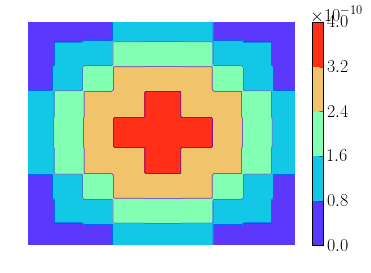

In [138]:
plot_doses_in_plane([-20,-20,107.5],[40,0,0],[0,40,0], names[1][0], names[1][1])

In [29]:
def plot_doses_in_line(p0, p1, file_n, file_p):
    p0 = np.array(p0).astype(float)
    p1 = np.array(p1).astype(float)
    x,y,z,doses = all_doses_full(file_n, file_p)
    points = []
    x_coord = []
    for i in range(100):
        points.append(p0 + (float(i)/100)*(p1 - p0))
        x_coord.append(np.linalg.norm((float(i)/100)*(p1 - p0)))
    doses_on_grid = any_points_doses(points, x,y,z,doses)
    plt.plot(x_coord, doses_on_grid)
    plt.xlabel('distane, sm')
    plt.ylabel(r'Dose $\bf \frac{mkr}{sec}$')
    plt.grid()
    #plt.yscale('log')
    #plt.axis('off')

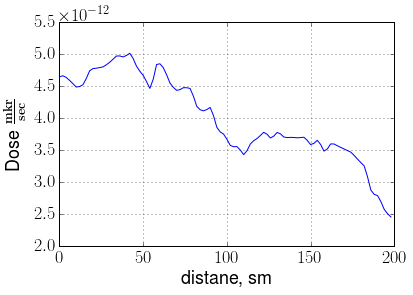

In [30]:
plot_doses_in_line([0,-98.5,0], [0,-98.5,200], names[1][0], names[1][1])

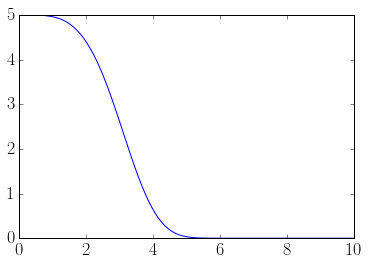

In [130]:
x = np.linspace(0,10,100)
y = []
d = 5
for p in x:
    if p < -2:
        y.append(d)
    else:
        y.append(d*(np.exp(-((p)*0.3)**4)))
plt.plot(x, y)

In [119]:
np.linalg.norm([3,4])

5.0